In [ ]:
import pandas as pd
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
%matplotlib inline
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")


In [ ]:
train = pd.read_csv("/content/sample_data/daily-website-visitors.csv")


In [ ]:
train.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


In [ ]:
train.dtypes

Row                   int64
Day                  object
Day.Of.Week           int64
Date                 object
Page.Loads           object
Unique.Visits        object
First.Time.Visits    object
Returning.Visits     object
dtype: object

In [ ]:
train['Date'] = pd.to_datetime(train.Date, format='%m/%d/%Y')
train['Page.Loads'] = train['Page.Loads'].str.replace(',', '')
train['Count'] = train['Page.Loads'].astype(str).astype(int)

In [ ]:
train = train[['Date', 'Count']]

# take data upto 12/31/2019
train.set_index('Date', inplace=True)
train = train[train.index <= '12/31/2019']
train.reset_index(inplace=True)

In [ ]:
# FOR EDA ONLY. Day.Of.Week = 1 means Sunday
train['year'] = train['Date'].dt.year
train['month'] = train['Date'].dt.month
train['day'] = train['Date'].dt.day
train['weekday name'] = train['Date'].dt.strftime("%a")

In [ ]:
len(train)

1935

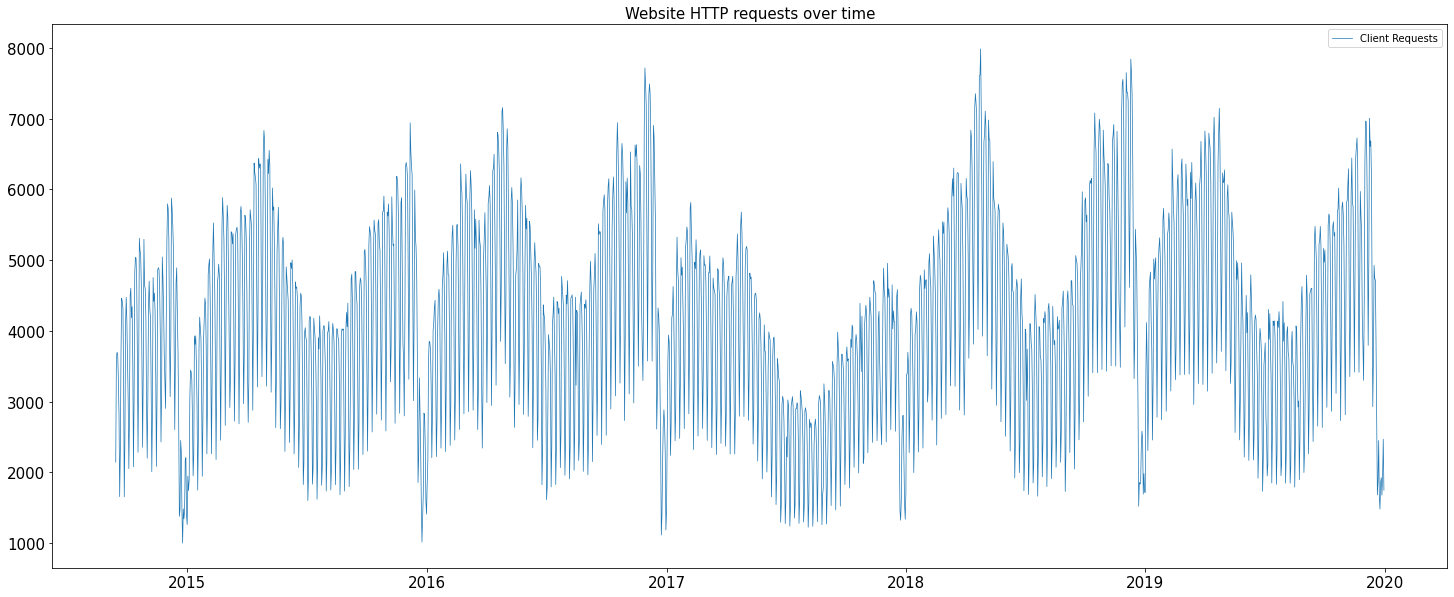

In [ ]:
# train.index = train['Date'] # indexing the Datetime to get the time period on the x-axis. 
# ts = train['Count'] 
plt.figure(figsize=(25,10)) 
plt.plot(train['Date'], train['Count'], label='Client Requests', linewidth='0.7')
plt.title('Website HTTP requests over time', fontdict={'fontsize':15}) 
plt.legend(loc='best')
plt.tick_params(axis='both', labelsize=15)
plt.show()

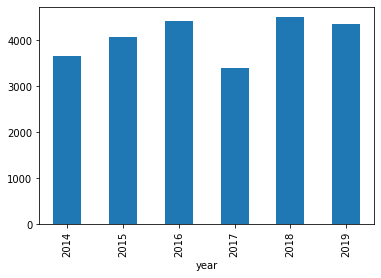

In [ ]:
train.groupby('year')['Count'].mean().plot.bar()

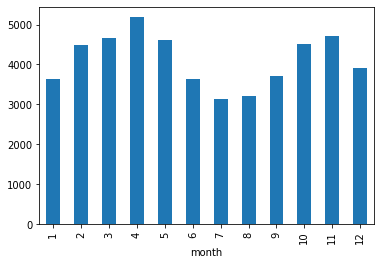

In [ ]:
train.groupby('month')['Count'].mean().plot.bar()

Text(0, 0.5, 'Hit count')

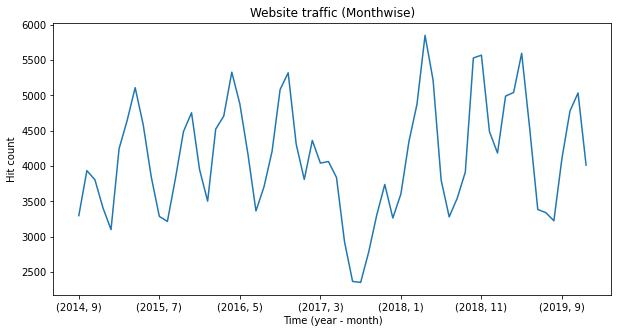

In [ ]:
temp = train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize=(10,5), title= 'Website traffic (Monthwise)')
plt.xlabel("Time (year - month)") 
plt.ylabel("Hit count")

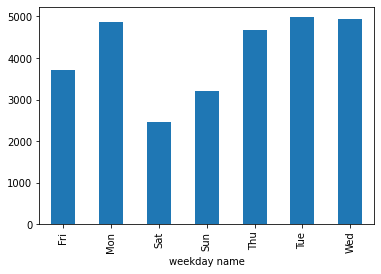

In [ ]:
# We see that the traffic is more on weekdays
train.groupby('weekday name')['Count'].mean().plot.bar()

TypeError: ignored

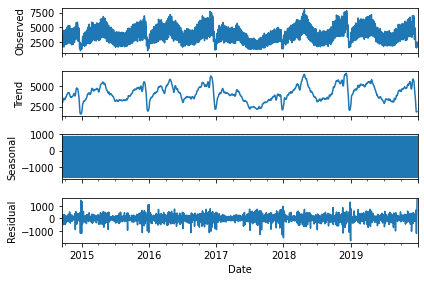

In [ ]:
import statsmodels.api as sm
train2 = train[['Date','Count']]
train2.set_index('Date', inplace=True)
sm.tsa.seasonal_decompose(train2['Count']).plot()
result = sm.tsa.stattools.adfuller(train2.Count)
plt.show()


In [ ]:
df = train2

def get_first_day_of_year():
  first_day_of_year = []
  for i in range(1, len(df)):
    prev_ind_yr = df.index[i-1].year
    curr_ind_yr = df.index[i].year
    if prev_ind_yr + 1 == curr_ind_yr:
      first_day_of_year.append(df.index[i])
  return first_day_of_year

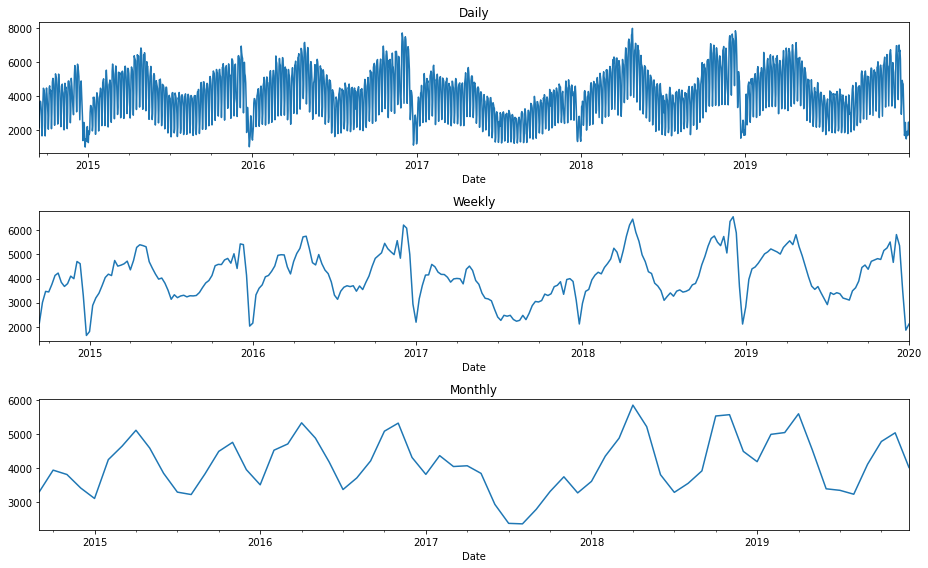

In [ ]:
import copy
data_new = copy.deepcopy(train)
data_new.index = pd.to_datetime(data_new.Date)

monthly = data_new.resample('M').mean()
weekly = data_new.resample('W').mean()
daily = data_new.resample('D').mean()

# first_day_of_year = get_first_day_of_year()
# for day in first_day_of_year:
#   plt.axvline(day, color='k', linestyle='--', alpha=0.2)


fig, axs = plt.subplots(3,1) 
daily.Count.plot(figsize=(13,8), title= 'Daily', ax=axs[0]) 
weekly.Count.plot(figsize=(13,8), title= 'Weekly', ax=axs[1])
monthly.Count.plot(figsize=(13,8), title= 'Monthly', ax=axs[2]) 
fig.tight_layout()
plt.show()

In [ ]:
import copy
train2 = copy.deepcopy(train)
train2['firstdiff'] = train2['Count'].diff()
train2.head()

,Date,Count,year,month,day,weekday name,firstdiff
0,2014-09-14,2146,2014,9,14,Sun,NaN
1,2014-09-15,3621,2014,9,15,Mon,1475.0
2,2014-09-16,3698,2014,9,16,Tue,77.0
3,2014-09-17,3667,2014,9,17,Wed,-31.0
4,2014-09-18,3316,2014,9,18,Thu,-351.0


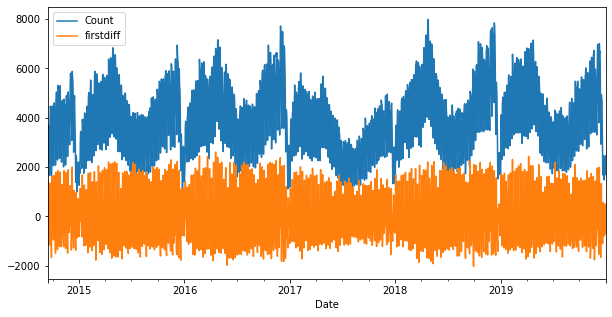

In [ ]:
train2.plot(x='Date', y=['Count', 'firstdiff'], figsize=(10,5))

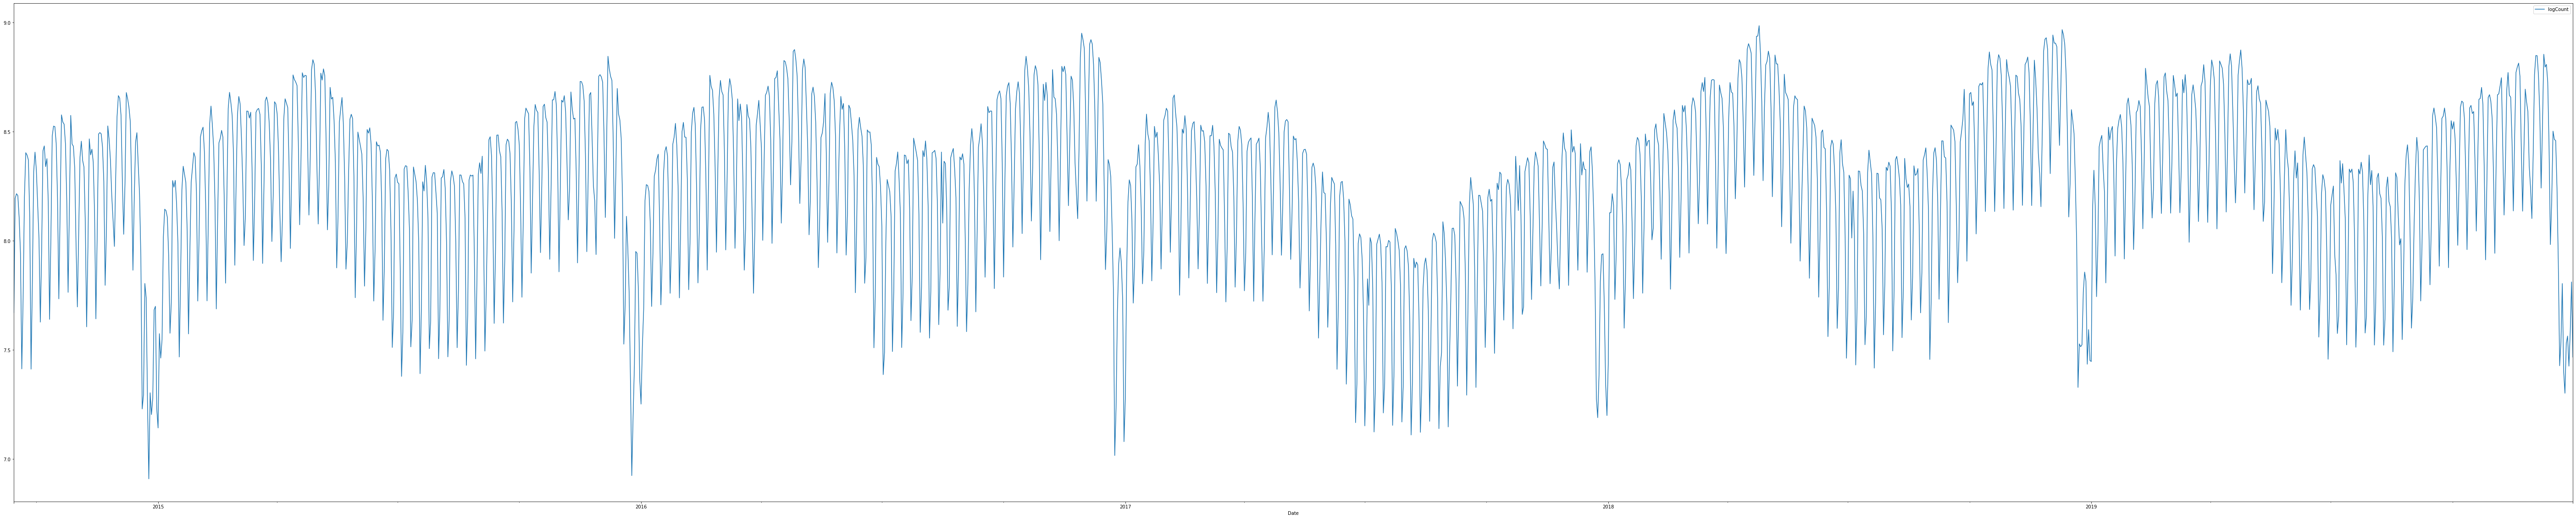

In [ ]:
train2['logCount'] = np.log(train2['Count'])
train2.plot(x='Date', y=['logCount'], figsize=(100,20))